# Barcelona Project - Communes of Medellin

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import GaussianMixture

from mypackage import dir, dataquality
from mypackage.transforms import convert_variables
from datacleaning import data_cleaning
from datatransform import convert_label
from datavisualizate import heatmap_groups

modality = 'p'
project = 'barcelona'
data = dir.make_dir_line(modality, project)
raw = data('raw')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## AIMS

Variables to use: x3 to x15
Variable to predict: x1

In [7]:
df = pd.read_csv(raw / 'info_comunas_med.csv', sep = ',', decimal = '.', header = 0)
##
## Apply data cleaning
##
df = data_cleaning(df)
##
## Evaluate data Quality
##
dataquality.data_quality(df)
df = convert_label(df, 'x2')
df.head()

Execution data quality starts.

*****
The dataframe does not contain missing values.
*****
The dataframe does not contain duplicate values.
*****
The dataframe contains values that are not numeric.
Variable not numerit: x2
*****
Discrete variable: x3
*****
The dimension of dataframe is (16, 15)
*****

Execution data quality ends.



,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,1,11,1,1960,2.300,122067,0.782,30.90,42.50,21.5,4.90,80.4,11.3,0.3,21
1,2,14,1,1950,2.210,103212,0.803,31.10,42.90,21.0,4.90,87.6,12.3,0.1,11
2,3,9,1,1940,5.495,148762,0.802,31.10,42.90,21.0,4.80,87.7,12.0,0.3,19
3,4,0,1,1950,4.872,135167,0.839,31.00,42.90,21.0,4.90,89.8,10.1,0.1,14
4,5,3,2,1930,6.100,142867,0.861,16.79,36.43,37.9,8.86,98.0,1.0,1.0,15


In [8]:
##
## Describe data
##
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,8.500000,7.500000,3.000000,1919.812500,6.909706,151681.75000,0.859062,26.430625,42.014375,25.275000,6.053750,94.106667,4.833333,0.560000,16.75000
std,4.760952,4.760952,1.712698,68.018839,4.753023,77201.73095,0.055837,4.168190,1.866576,4.344882,1.372914,5.288915,4.438118,0.985765,4.78191
min,1.000000,0.000000,1.000000,1675.000000,2.210000,84266.00000,0.782000,16.790000,36.430000,21.000000,4.100000,80.400000,0.000000,0.000000,7.00000
25%,4.750000,3.750000,1.750000,1930.000000,4.626500,114363.75000,0.814500,23.800000,41.775000,21.400000,4.900000,92.125000,0.875000,0.100000,13.75000
50%,8.500000,7.500000,3.000000,1938.000000,6.031500,133838.00000,0.847000,25.500000,42.300000,25.700000,5.900000,95.650000,4.250000,0.100000,17.00000
75%,12.250000,11.250000,4.000000,1950.000000,7.475000,161991.00000,0.893750,30.450000,42.900000,27.350000,7.000000,97.250000,7.775000,0.365000,19.50000
max,16.000000,15.000000,6.000000,1960.000000,23.000000,410671.00000,0.979000,31.100000,44.400000,37.900000,8.860000,100.000000,12.300000,3.000000,25.00000


## Similarity analysis

Using Kmeans

In [9]:
##
## Choose data
##
y = df['x1']
X = df.copy()
X.drop(['x1', 'x2'], axis = 1, inplace = True)

In [10]:
##
## Scale data
##
scaler = StandardScaler()
X_esc = scaler.fit_transform(X)

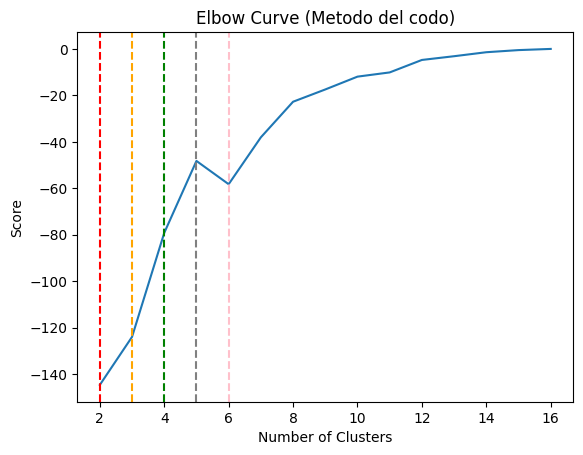

In [11]:
##
## Choose K
##
Nc = range(2, 17)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(X_esc).score(X_esc) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.axvline(x = 2, color='red', linestyle='--')
plt.axvline(x = 3, color='orange', linestyle='--')
plt.axvline(x = 4, color='green', linestyle='--')
plt.axvline(x = 5, color='gray', linestyle='--')
plt.axvline(x = 6, color='pink', linestyle='--')
plt.title('Elbow Curve (Metodo del codo)')
plt.show()

In [12]:
##
## Fit kmeans con K = 3
##
kmeans = KMeans(n_clusters = 3).fit(X_esc)

In [13]:
##
## Centroids
##
# centroids = kmeans.cluster_centers_
# print(centroids)

In [14]:
##
## Predicting the clusters and heatmap
##
df_g = pd.DataFrame(X_esc)
df_g['group'] = kmeans.predict(X_esc)

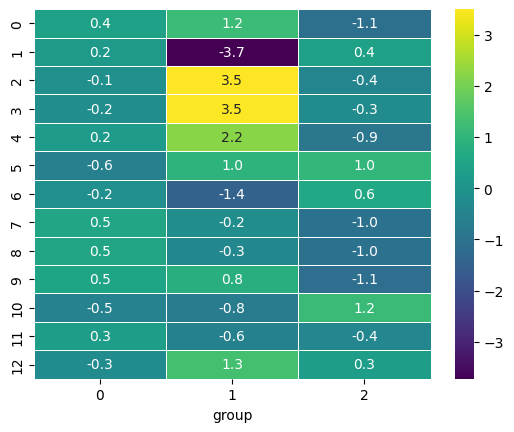

In [15]:
##
## Heatmap groups
##
heatmap_groups(df_g, "group", 1)

## Dendrograms
Using linkage

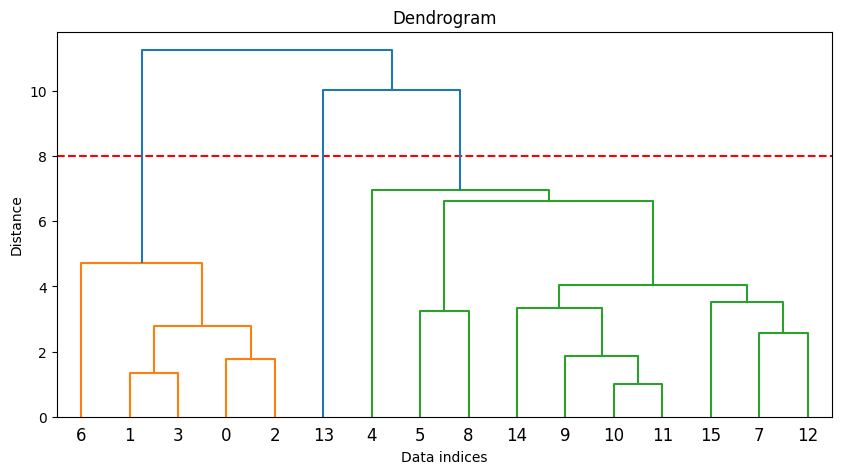

In [16]:
##
## Fit linkage
##
Z = linkage(X_esc, method='ward', metric='euclidean')

##
## View the dendrogram
##
plt.figure(figsize=(10, 5))
cutting_height = 8
plt.axhline(y=cutting_height, color='r', linestyle='--', label=f'Corte en {cutting_height}')
dendrogram_result = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data indices')
plt.ylabel('Distance')
plt.show()

In [17]:
leaves_color_list = dendrogram_result['leaves_color_list']
leaves_order = dendrogram_result['leaves']

# Rearrange the DataFrame according to the order of the sheets
df_g = df_g.iloc[leaves_order].copy()
df_g['group2'] = leaves_color_list
df_g['group2'] = df_g['group2'].apply(lambda x: x[1:] if x.startswith('C') else x)
df_g['group2'] = df_g['group2'].astype(int)
df_g = df_g.sort_index()
df_g2 = df_g.copy()
df_g2 = df_g2.iloc[:, :13].join(df_g2.iloc[:, -1:])

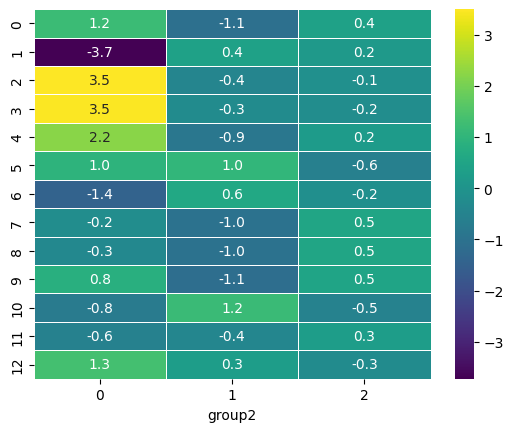

In [18]:
##
## Heatmap groups
##
heatmap_groups(df_g2, "group2", 1)

## Using sklearn (AgglomerativeClustering)

In [21]:
agglomerativeClustering = AgglomerativeClustering(
    # -------------------------------------------------------------------------
    # The number of clusters to find.
    n_clusters = None,
    # -------------------------------------------------------------------------
    # "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is
    # "ward", only "euclidean" is accepted.
    metric='euclidean',
    # -------------------------------------------------------------------------
    # {'ward', 'complete', 'average', 'single'}
    linkage='ward',
    # -------------------------------------------------------------------------
    # The linkage distance threshold above which, clusters will not be merged.
    distance_threshold=8,
)

agglomerativeClustering.fit(X_esc)

AgglomerativeClustering(distance_threshold=8, n_clusters=None)

In [25]:
print(agglomerativeClustering.n_clusters_)
print(agglomerativeClustering.labels_)
print(agglomerativeClustering.n_leaves_)

3
[1 1 1 1 0 0 1 0 0 0 0 0 0 2 0 0]
16


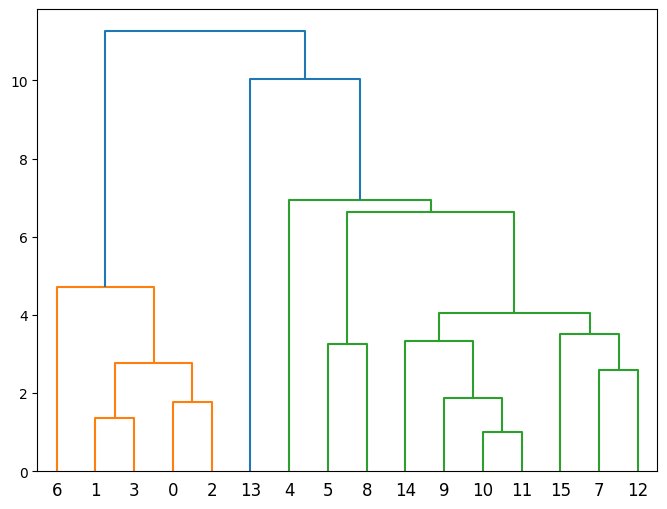

In [26]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


plt.figure(figsize=(8,6))
plot_dendrogram(
    agglomerativeClustering,
    truncate_mode="level",
    p=11,
)

In [27]:
agglomerativeClustering = AgglomerativeClustering(
    # -------------------------------------------------------------------------
    # The number of clusters to find.
    n_clusters = 3,
    # -------------------------------------------------------------------------
    # "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is
    # "ward", only "euclidean" is accepted.
    metric='euclidean',
    # -------------------------------------------------------------------------
    # {'ward', 'complete', 'average', 'single'}
    linkage='ward',
    # -------------------------------------------------------------------------
    # The linkage distance threshold above which, clusters will not be merged.
    distance_threshold=None,
)

agglomerativeClustering.fit(X_esc)

AgglomerativeClustering(n_clusters=3)

In [28]:
print(agglomerativeClustering.n_clusters_)
print(agglomerativeClustering.labels_)
print(agglomerativeClustering.n_leaves_)

3
[1 1 1 1 0 0 1 0 0 0 0 0 0 2 0 0]
16


In [29]:
df_g['group3'] = agglomerativeClustering.labels_
df_g3 = df_g.copy()
df_g3 = df_g3.iloc[:, :13].join(df_g3.iloc[:, -1:])

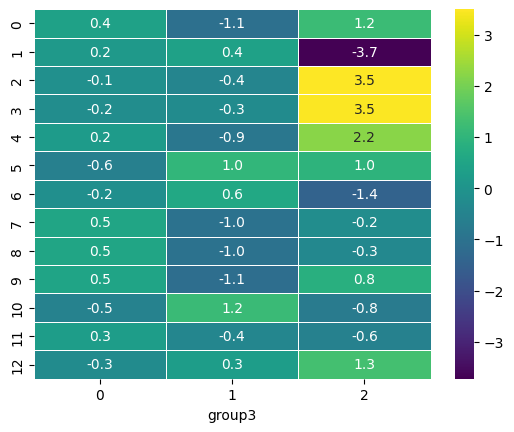

In [30]:
##
## Heatmap groups
##
heatmap_groups(df_g3, "group3", 1)

## Using GaussianMixture

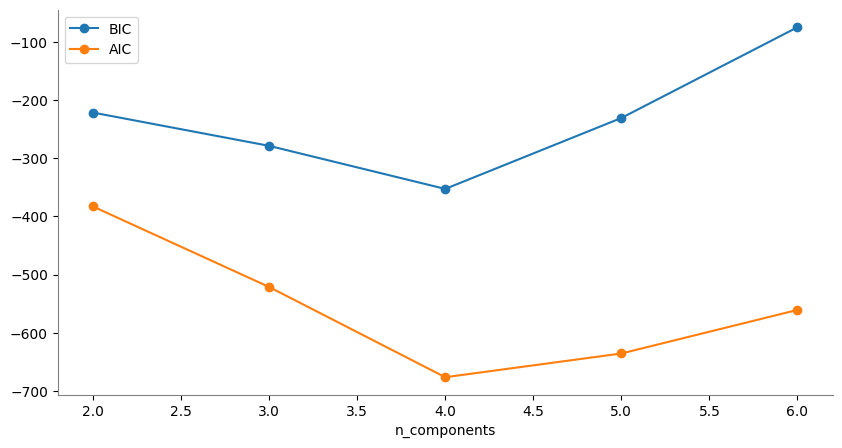

In [31]:
#
# Numero de componentes
#
n_components = np.arange(2, 7)

gaussianModels = [
    GaussianMixture(n, covariance_type="full", random_state=0).fit(X_esc)
    for n in n_components
]

plt.figure(figsize=(10, 5))
plt.plot(n_components, [model.bic(X_esc) for model in gaussianModels], "o-", label="BIC")
plt.plot(n_components, [model.aic(X_esc) for model in gaussianModels], "o-", label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [32]:
n_components = 4
gaussianMixture = GaussianMixture(
    # -----------------------------------------------------
    # The number of mixture components.
    n_components=n_components,
    # -----------------------------------------------------
    # String describing the type of covariance parameters
    # to use. Must be one of:
    # ‘full’
    #    each component has its own general covariance
    #    matrix
    # ‘tied’
    #    all components share the same general covariance
    #    matrix
    # ‘diag’
    #    each component has its own diagonal covariance matrix
    # ‘spherical’
    #    each component has its own single variance
    covariance_type="full",
    # -----------------------------------------------------
    # The number of EM iterations to perform.
    max_iter=100,
    # -----------------------------------------------------
    # The method used to initialize the weights
    #   'kmeans'
    #   'random'
    init_params="kmeans",
)

gaussianMixture.fit(X_esc)
df_g["group4"] = gaussianMixture.predict(X_esc)

In [33]:
df_g4 = df_g.copy()
df_g4 = df_g4.iloc[:, :13].join(df_g4.iloc[:, -1:])

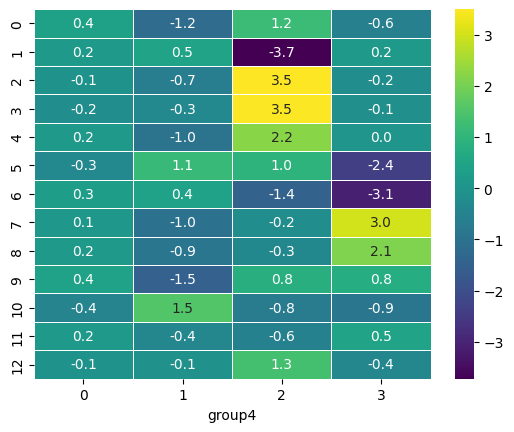

In [34]:
##
## Heatmap groups
##
heatmap_groups(df_g4, "group4", 1)

## Compare groups
Status: incomplete

In [35]:
df_g['group'].value_counts()

group
0    10
2     5
1     1
Name: count, dtype: int64

In [36]:
df_g['group2'].value_counts()

group2
2    10
1     5
0     1
Name: count, dtype: int64

In [37]:
df_g['group3'].value_counts()

group3
0    10
1     5
2     1
Name: count, dtype: int64

In [38]:
df_g['group4'].value_counts()

group4
0    10
1     4
3     1
2     1
Name: count, dtype: int64

In [39]:
# Seleccionar las columnas que quieres contar
columnas_seleccionadas = ['group4', 'group', 'group2', 'group3']

# Crear un nuevo DataFrame para almacenar los conteos
conteos_df = pd.DataFrame()

# Iterar sobre las columnas seleccionadas y contar los elementos únicos
for columna in columnas_seleccionadas:
    conteo = df_g[columna].value_counts()
    conteos_df[columna + '_conteo'] = conteo

# Mostrar el DataFrame de conteos resultante
print(conteos_df)

        group4_conteo  group_conteo  group2_conteo  group3_conteo
group4                                                           
0                  10          10.0            1.0           10.0
1                   4           1.0            5.0            5.0
3                   1           NaN            NaN            NaN
2                   1           5.0           10.0            1.0


In [40]:
df_g.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,group,group2,group3,group4
0,-1.206045,0.610206,-1.001654,-0.396183,-1.425390,1.107423,0.268701,-0.897332,-0.867926,-2.676576,1.504860,-0.272404,0.917914,2,1,1,1
1,-1.206045,0.458366,-1.021210,-0.648423,-1.036962,1.156979,0.490025,-1.016184,-0.867926,-1.270593,1.737570,-0.481946,-1.241883,2,1,1,1
2,-1.206045,0.306526,-0.307405,-0.039060,-1.055459,1.156979,0.490025,-1.016184,-0.943153,-1.251065,1.667757,-0.272404,0.485954,2,1,1,1
3,-1.206045,0.458366,-0.442778,-0.220932,-0.371087,1.132201,0.490025,-1.016184,-0.867926,-0.840987,1.225607,-0.481946,-0.593944,2,1,1,1
4,-0.603023,0.154687,-0.175943,-0.117923,0.035837,-2.388758,-3.089892,3.001012,2.111045,0.760273,-0.892056,0.460992,-0.377964,0,2,0,3


In [41]:
df_c = df_g.copy()
df_c = df_c.iloc[:, :13]

g1 = df_g['group']
g2 = df_g['group2']
g3 = df_g['group3']
g4 = df_g['group4']

In [42]:
wcss_per_cluster = kmeans.inertia_
wcss_per_cluster

94.34069938731113

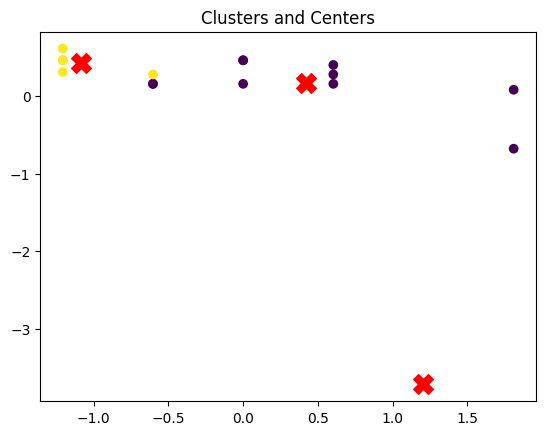

In [43]:
plt.scatter(X_esc[:, 0], X_esc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title('Clusters and Centers')
plt.show()

In [44]:
print('ok_')

ok_
